# Import Libraries

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Breast cancer dataset

In [31]:
import pandas as pd

# Load Breast Cancer dataset from Excel
df = pd.read_excel(r"C:\Users\shaik\Downloads\breast_cancer_data (1).xlsx")
df['target'] = y

In [32]:
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [50]:
print(data.tail())

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726 

# Duplicate Rows

In [5]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


In [7]:
print(data.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
x = data.drop(columns=['diagnosis'])  # Example correction
y = data['diagnosis']


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Handling missing values

In [10]:
print(x.isnull().sum())  # Check for missing values
x = x.fillna(x.mean())  # Handle missing values, if any


id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [46]:
# Drop the 'id' column if it exists, as it is not relevant for the model
if 'id' in data.columns:
    data = data.drop(columns=['id'])


In [47]:
# Encode the 'diagnosis' column to numeric values (e.g., 0 for benign, 1 for malignant)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})


In [48]:
# Define features (X) and target (y)
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']                # Target


In [25]:
# If the target column is indeed named 'target'
X = df.drop(columns='target')  # Drop 'target' column to get the features
y = df['target']  # Extract 'target' as labels

# If athe target column is named something else (like 'class' or 'label'), adjust accordingly:
# X = df.drop(columns='class')  # Replace 'class' with the correct column name
# y = df['class']  # Replace 'class' with the correct column name

# Print the shapes and feature names for verification
print(X.shape)
print(y.shape)
print(X.columns.tolist())


(569, 32)
(569,)
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [28]:
# Check the column names in your DataFrame
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


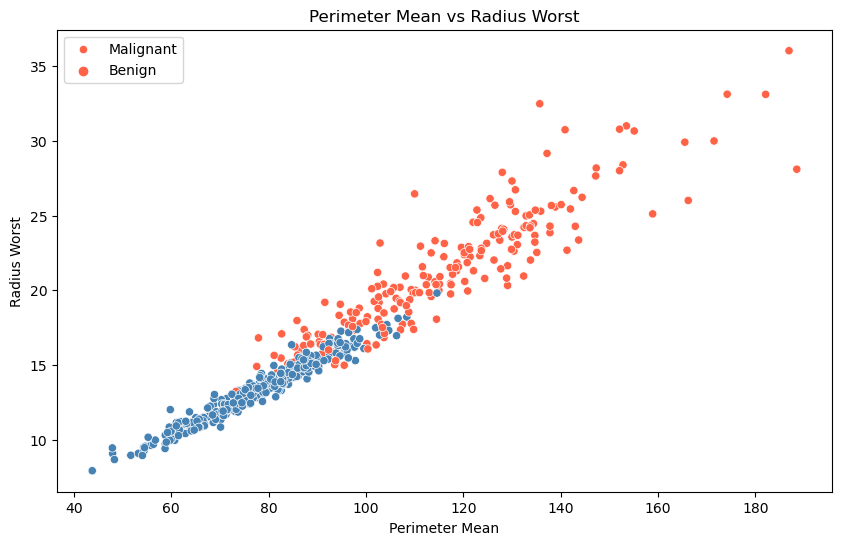

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel(r"C:\Users\shaik\Downloads\breast_cancer_data (1).xlsx")

# Check the columns and rename if necessary
print(data.columns)  # Check the column names
# data.rename(columns={'Perimeter Mean': 'perimeter_mean', 'Radius Worst': 'radius_worst'}, inplace=True)

# Ensure 'diagnosis' is properly labeled
data['diagnosis'] = data['diagnosis'].replace({'M': 'malignant', 'B': 'benign'})

# Handle missing values
data = data.dropna(subset=['perimeter_mean', 'radius_worst', 'diagnosis'])

# Plotting using the corrected column names
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='perimeter_mean', 
    y='radius_worst', 
    hue='diagnosis', 
    palette=['#FF6347', '#4682B4']
)
plt.title('Perimeter Mean vs Radius Worst')
plt.xlabel('Perimeter Mean')
plt.ylabel('Radius Worst')
plt.legend(labels=['Malignant', 'Benign'])
plt.show()


In [29]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the cleaned column names
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')


# Split data into training and test sets

In [39]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# HyperparameterTuning: AdaBoost with GridSearchCV

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Load the dataset
data = pd.read_excel(r"C:\Users\shaik\Downloads\breast_cancer_data (1).xlsx")

# Preprocessing
if 'id' in data.columns:
    data = data.drop(columns=['id'])  # Drop 'id' if it exists
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})  # Encode labels

# Define features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base estimator for AdaBoost
base_estimator = DecisionTreeClassifier()

# Initialize AdaBoost
ada = AdaBoostClassifier(base_estimator=base_estimator)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'base_estimator__max_depth': [1, 2, 3, 4]  # Depth of the base decision tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on test data:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


C:\Users\shaik\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'base_estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 150}

Accuracy on test data: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[70  1]
 [ 2 41]]


# Re evaluate the tuned model

Accuracy of the tuned AdaBoost model: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



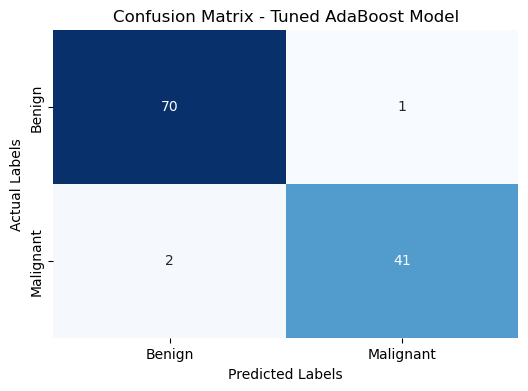

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the tuned AdaBoost model:", accuracy)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Tuned AdaBoost Model")
plt.show()


# Displaying Evaluation Results




Accuracy of the tuned AdaBoost model: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



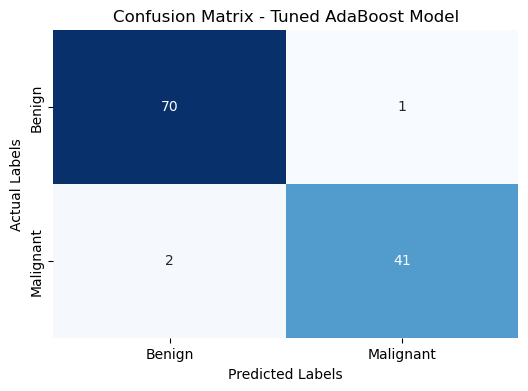


Confusion Matrix (Raw Counts):
[[70  1]
 [ 2 41]]

For Malignant (1) Class:
Precision: 0.9762
Recall: 0.9535
F1-Score: 0.9647


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned AdaBoost model: {accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=['Benign', 'Malignant'],  # Custom labels for predictions
    yticklabels=['Benign', 'Malignant']  # Custom labels for actual values
)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Tuned AdaBoost Model")
plt.show()

# Additional Result Display
print("\nConfusion Matrix (Raw Counts):")
print(conf_matrix)

# Optionally, you can display the accuracy, precision, recall, and F1 scores directly
precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
f1_score = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']

print(f"\nFor Malignant (1) Class:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


# Classification Report After Hyperparameter Tuning

Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



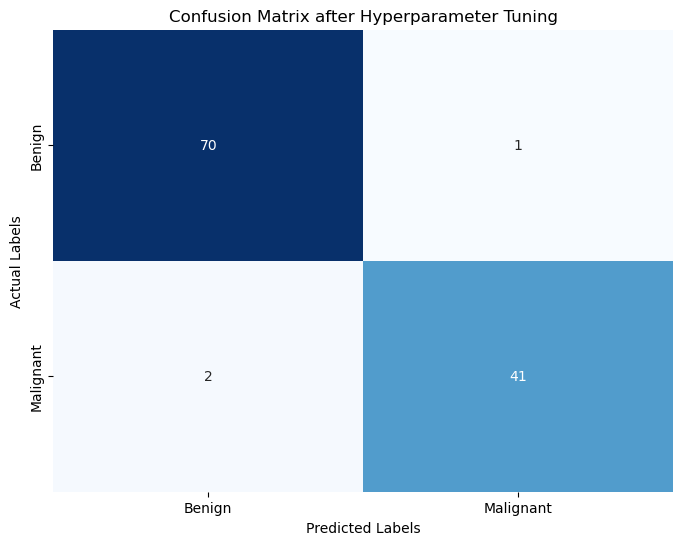

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model obtained from GridSearchCV
y_pred = best_model.predict(X_test)

# Generate the classification report
print("Classification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=['Benign', 'Malignant'],  # Custom labels for predictions
    yticklabels=['Benign', 'Malignant']  # Custom labels for actual values
)
plt.title('Confusion Matrix after Hyperparameter Tuning')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
